In [274]:
#Clustering of each type of crimes -02_01_District_wise_crimes_committed_against_SC_2001_2012.csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [275]:
# Importing Data and removing total crimes
df=pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df=df.drop(list(df[df["DISTRICT"]=="TOTAL"].index))

In [276]:
df.shape

(8597, 13)

In [277]:
df.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


In [278]:
df.tail()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8597 entries, 0 to 9016
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              8597 non-null   object
 1   DISTRICT                              8597 non-null   object
 2   Year                                  8597 non-null   int64 
 3   Murder                                8597 non-null   int64 
 4   Rape                                  8597 non-null   int64 
 5   Kidnapping and Abduction              8597 non-null   int64 
 6   Dacoity                               8597 non-null   int64 
 7   Robbery                               8597 non-null   int64 
 8   Arson                                 8597 non-null   int64 
 9   Hurt                                  8597 non-null   int64 
 10  Prevention of atrocities (POA) Act    8597 non-null   int64 
 11  Protection of Civil Rights (PC

In [280]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [281]:
x=['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
df['Total']= df[x].sum(axis=1)


In [282]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Total'],
      dtype='object')

In [283]:
df.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32,55
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53,127
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34,114
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7,89


In [284]:
District= pd.DataFrame(df.groupby(['DISTRICT'])['Total'].sum())
District

,Total
DISTRICT,
24 PARGANAS NORTH,22
24 PARGANAS SOUTH,7
A and N ISLANDS,0
ADILABAD,686
AGRA,1943
...,...
WOKHA,2
YADGIRI,253
YAMUNANAGAR,84


In [285]:
#Top 10 district with highest crime against SC Caste 
import plotly.express as px
df_top10 = District.sort_values('Total',ascending=False).head(10)
fig = px.pie(df_top10,values='Total',names=df_top10.index,title = 'PIECHART',template='plotly_dark')
fig.update_layout(title = 'Top 10 district with highest crime against SC Caste (%) in top 10 states',title_font_size=24,paper_bgcolor='black',
                     title_font_family='Aerial',font={'color':'red','family':'Times New Roman','size':10})
import plotly.io as pio#to display a figure defined by a dictuse the low level plotly.io.show
pio.show(fig)

In [286]:
States= pd.DataFrame(df.groupby(['STATE/UT'])['Total'].sum())


In [287]:
#Top 10 States with highest crime against SC Caste 
import plotly.express as px
df_top10 = States.sort_values('Total',ascending=False).head(10)
fig = px.pie(df_top10,values='Total',names=df_top10.index,title = 'PIECHART',template='plotly_dark')
fig.update_layout(title = 'Top 10 States with highest crime against SC Caste (%) in top 10 states',title_font_size=24,paper_bgcolor='black',
                     title_font_family='Aerial',font={'color':'red','family':'Times New Roman','size':10})
import plotly.io as pio#to display a figure defined by a dictuse the low level plotly.io.show
pio.show(fig)

In [288]:

y= pd.DataFrame(df.groupby(['DISTRICT','STATE/UT'])['Total'].sum())

y.sort_values(by="Total",ascending=False)

,,Total
DISTRICT,STATE/UT,
BHARATPUR,RAJASTHAN,5143
SITAPUR,UTTAR PRADESH,3654
GANGANAGAR,RAJASTHAN,3625
KURNOOL,ANDHRA PRADESH,3450
UJJAIN,MADHYA PRADESH,3441
...,...,...
DIBANG VALLEY,ARUNACHAL PRADESH,0
SRINAGAR,JAMMU & KASHMIR,0
DIMAPUR,NAGALAND,0


In [290]:

District['Result'] = District['Total'].apply(lambda District: 'Sensitive' if District>=2500  else 'Moderate'if District>=1000 and District<2500 else 'Peacfull')

District

,Total,Result
DISTRICT,,
24 PARGANAS NORTH,22,Peacfull
24 PARGANAS SOUTH,7,Peacfull
A and N ISLANDS,0,Peacfull
ADILABAD,686,Peacfull
AGRA,1943,Moderate
...,...,...
WOKHA,2,Peacfull
YADGIRI,253,Peacfull
YAMUNANAGAR,84,Peacfull


Peacfull     690
Moderate     105
Sensitive     17
Name: Result, dtype: int64


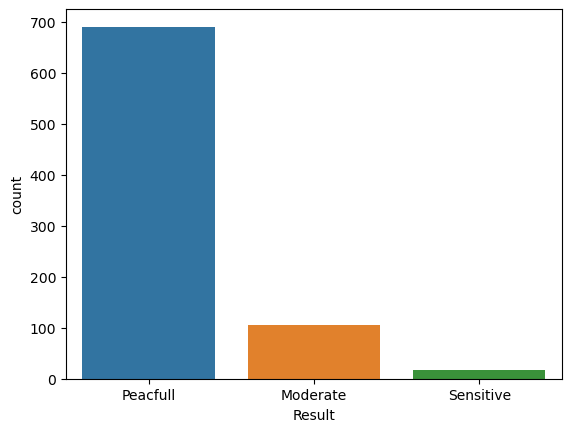

In [291]:
ax=sns.countplot(data=Z,x='Result')
print(Z['Result'].value_counts())

In [292]:
#Wifercating 
sorting=y.sort_values(by="Total",ascending=False)

In [293]:
# Top 10 district with highest Crime against SC
sorting.head(17)

,,Total
DISTRICT,STATE/UT,
BHARATPUR,RAJASTHAN,5143
SITAPUR,UTTAR PRADESH,3654
GANGANAGAR,RAJASTHAN,3625
KURNOOL,ANDHRA PRADESH,3450
UJJAIN,MADHYA PRADESH,3441
KARIMNAGAR,ANDHRA PRADESH,3331
ALWAR,RAJASTHAN,3272
GULBARGA,KARNATAKA,2810
WEST GODAVARI,ANDHRA PRADESH,2738


In [294]:
# Bottom  10 district with Lowest Crime against SC
sorting.tail(17)

,,Total
DISTRICT,STATE/UT,
KAMRUP,ASSAM,0
KAMENG WEST,ARUNACHAL PRADESH,0
RURAL,ARUNACHAL PRADESH,0
DARRANG,ASSAM,0
DHALAI,TRIPURA,0
S.T.F.,DELHI,0
SUKMA,CHHATTISGARH,0
SUBANSIRI UPPER,ARUNACHAL PRADESH,0
SUBANSIRI LOWER,ARUNACHAL PRADESH,0


In [295]:
y.groupby

<bound method DataFrame.groupby of                                   Total
DISTRICT          STATE/UT             
24 PARGANAS NORTH WEST BENGAL        22
24 PARGANAS SOUTH WEST BENGAL         7
A and N ISLANDS   A & N ISLANDS       0
ADILABAD          ANDHRA PRADESH    686
AGRA              UTTAR PRADESH    1943
...                                 ...
WOKHA             NAGALAND            2
YADGIRI           KARNATAKA         253
YAMUNANAGAR       HARYANA            84
YAVATMAL          MAHARASHTRA       286
ZUNHEBOTO         NAGALAND            1

[833 rows x 1 columns]>

In [296]:
states=pd.DataFrame(df.groupby(['STATE/UT'])['Total'].sum())


In [297]:
states['Result'] = states['Total'].apply(lambda states: 'Sensitive' if states>=50982  else 'Moderate'if states>=25491 and states<50982 else 'Peacfull')
sorted_values=states.sort_values(by="Total",ascending=False)
sorted_values

,Total,Result
STATE/UT,,
UTTAR PRADESH,76473,Sensitive
RAJASTHAN,55002,Sensitive
MADHYA PRADESH,49810,Moderate
ANDHRA PRADESH,43419,Moderate
BIHAR,33341,Moderate
KARNATAKA,24406,Peacfull
TAMIL NADU,18623,Peacfull
ODISHA,18406,Peacfull
GUJARAT,13940,Peacfull


In [298]:
states.head(10)

,Total,Result
STATE/UT,,
A & N ISLANDS,0,Peacfull
ANDHRA PRADESH,43419,Moderate
ARUNACHAL PRADESH,2,Peacfull
ASSAM,946,Peacfull
BIHAR,33341,Moderate
CHANDIGARH,11,Peacfull
CHHATTISGARH,5214,Peacfull
D & N HAVELI,7,Peacfull
DAMAN & DIU,5,Peacfull


Peacfull     30
Moderate      3
Sensitive     2
Name: Result, dtype: int64


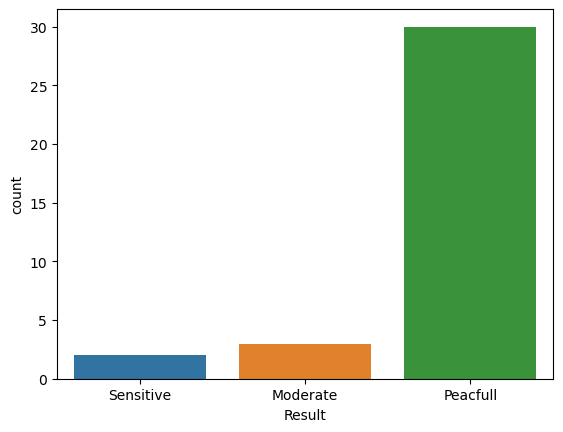

In [299]:
ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())

#02_District_wise_crimes_committed_against_ST_2001_2012

In [300]:
df=pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df.shape

(9018, 13)

In [301]:
#cheking columns total available or not 
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [302]:
#Removing total crime present for evert district
df=df.drop(list(df[df["DISTRICT"]=="TOTAL"].index))

In [303]:
#we have to add all columns and make total for all crime againt ST
x=['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs']
df['Total']= df[x].sum(axis=1)


In [304]:
#Group by District to Segegate districts in Clusters
y= pd.DataFrame(df.groupby(['DISTRICT','STATE/UT'])['Total'].sum())
y.sort_values(by="Total",ascending=False)


Total
DISTRICT   STATE/UT             
BETUL      MADHYA PRADESH    914
MAYURBHANJ ODISHA            895
NALGONDA   ANDHRA PRADESH    886
SEONI      MADHYA PRADESH    804
TONK       RAJASTHAN         764
...                          ...
NORTH EAST DELHI               0
NORTH      DELHI               0
           A & N ISLANDS       0
EAST       DELHI               0
FARIDABAD  HARYANA             0

[833 rows x 1 columns]

In [305]:
y['Result'] = y['Total'].apply(lambda y: 'Sensitive' if y >=610  else 'Moderate'if y >=305 and y<610 else 'Peacfull')
sorted_values=y.sort_values(by="Total",ascending=False)
sorted_values


Total     Result
DISTRICT   STATE/UT                        
BETUL      MADHYA PRADESH    914  Sensitive
MAYURBHANJ ODISHA            895  Sensitive
NALGONDA   ANDHRA PRADESH    886  Sensitive
SEONI      MADHYA PRADESH    804  Sensitive
TONK       RAJASTHAN         764  Sensitive
...                          ...        ...
NORTH EAST DELHI               0   Peacfull
NORTH      DELHI               0   Peacfull
           A & N ISLANDS       0   Peacfull
EAST       DELHI               0   Peacfull
FARIDABAD  HARYANA             0   Peacfull

[833 rows x 2 columns]

Peacfull     753
Moderate      64
Sensitive     16
Name: Result, dtype: int64


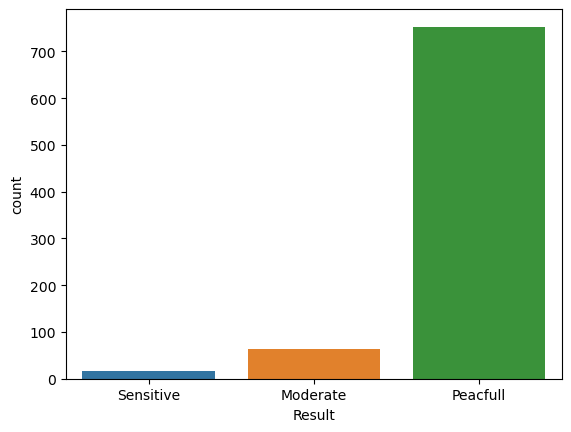

In [306]:
ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())

In [307]:
#top 5 sensetive 
sorted_values.head(5)


,,Total,Result
DISTRICT,STATE/UT,,
BETUL,MADHYA PRADESH,914,Sensitive
MAYURBHANJ,ODISHA,895,Sensitive
NALGONDA,ANDHRA PRADESH,886,Sensitive
SEONI,MADHYA PRADESH,804,Sensitive
TONK,RAJASTHAN,764,Sensitive


In [308]:
# Peacefull districts
sorted_values.tail(5)

Total    Result
DISTRICT   STATE/UT                      
NORTH EAST DELHI              0  Peacfull
NORTH      DELHI              0  Peacfull
           A & N ISLANDS      0  Peacfull
EAST       DELHI              0  Peacfull
FARIDABAD  HARYANA            0  Peacfull

In [309]:
#Segregating crime agaist states
states=pd.DataFrame(df.groupby(['STATE/UT'])['Total'].sum())
states.sort_values(by="Total",ascending=False)

,Total
STATE/UT,
MADHYA PRADESH,18191
RAJASTHAN,12990
ANDHRA PRADESH,8093
ODISHA,6350
CHHATTISGARH,6005
MAHARASHTRA,3100
KARNATAKA,3061
JHARKHAND,2968
GUJARAT,2635


In [310]:
states['Result'] = states['Total'].apply(lambda states: 'Sensitive' if states >=12127  else 'Moderate'if states >=6063 and states<12127 else 'Peaceful')
sorted_values=states.sort_values(by="Total",ascending=False)
sorted_values

,Total,Result
STATE/UT,,
MADHYA PRADESH,18191,Sensitive
RAJASTHAN,12990,Sensitive
ANDHRA PRADESH,8093,Moderate
ODISHA,6350,Moderate
CHHATTISGARH,6005,Peaceful
MAHARASHTRA,3100,Peaceful
KARNATAKA,3061,Peaceful
JHARKHAND,2968,Peaceful
GUJARAT,2635,Peaceful


Peaceful     31
Sensitive     2
Moderate      2
Name: Result, dtype: int64


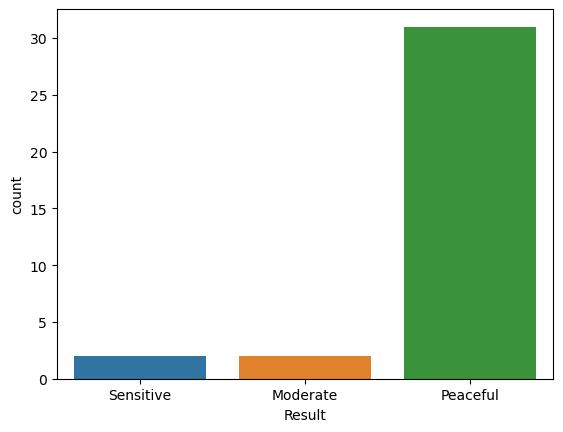

In [311]:
ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())

#03_District_wise_crimes_committed_against_children_2001_2012

In [312]:
df=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv')


In [313]:
df.shape

(9015, 15)

In [314]:
#Total of all columns present here
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

In [315]:
#column for each year present so we have to remove
df=df.drop(list(df[df["DISTRICT"]=="TOTAL"].index))

In [316]:
District= pd.DataFrame(df.groupby(['DISTRICT','STATE/UT'])['Total'].sum())
District.sort_values(by="Total",ascending=False)

,,Total
DISTRICT,STATE/UT,
INDORE,MADHYA PRADESH,4401
ZDELHI UT TOTAL,DELHI,4179
DELHI UT TOTAL,DELHI,3917
NORTH-WEST,DELHI,3447
PUNE COMMR.,MAHARASHTRA,3391
...,...,...
RAILWAYS JAMMU,JAMMU & KASHMIR,0
TEHRI GARHWAL,UTTARAKHAND,0
RAILWAYS KASHMIR,JAMMU & KASHMIR,0


In [317]:
District ['Result'] = District ['Total'].apply(lambda District: 'Sensitive' if District >=2153  else 'Moderate'if District >=1467 and District <2153 else 'Peacefull')



Peacefull    816
Sensitive     14
Moderate      12
Name: Result, dtype: int64


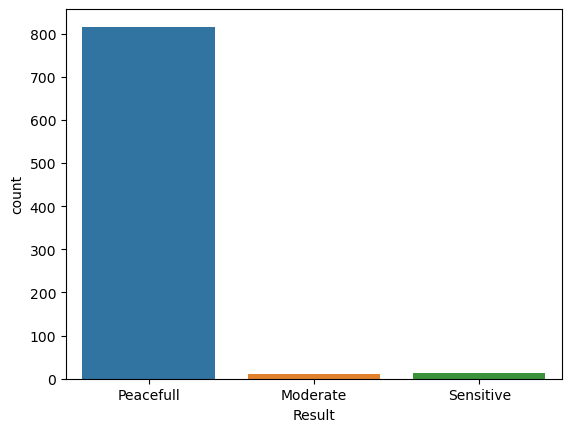

In [318]:
ax=sns.countplot(data= District,x='Result')
print(District ['Result'].value_counts())



In [319]:
# Sensitive District
sorting=y.sort_values(by="Total",ascending=False)
sorting.head(17)


,,Total,Result
DISTRICT,STATE/UT,,
BETUL,MADHYA PRADESH,914,Sensitive
MAYURBHANJ,ODISHA,895,Sensitive
NALGONDA,ANDHRA PRADESH,886,Sensitive
SEONI,MADHYA PRADESH,804,Sensitive
TONK,RAJASTHAN,764,Sensitive
SAGAR,MADHYA PRADESH,731,Sensitive
JAGDALPUR,CHHATTISGARH,713,Sensitive
KHANDWA,MADHYA PRADESH,700,Sensitive
WARANGAL,ANDHRA PRADESH,692,Sensitive


In [320]:
#Peacefull District
sorting.tail(17)


,,Total,Result
DISTRICT,STATE/UT,,
PANCHKULA,HARYANA,0,Peacfull
PALWAL,HARYANA,0,Peacfull
BHIWANI,HARYANA,0,Peacfull
BHOJPUR,BIHAR,0,Peacfull
EOW,DELHI,0,Peacfull
GURDASPUR,PUNJAB,0,Peacfull
OUTER,DELHI,0,Peacfull
GURGAON,HARYANA,0,Peacfull
BIEO,ASSAM,0,Peacfull


In [321]:
# State wise crimes_committed_against_children_2001_2012
states=pd.DataFrame(df.groupby(['STATE/UT'])['Total'].sum())
sorted_values=states.sort_values(by="Total",ascending=False)
sorted_values

,Total
STATE/UT,
MADHYA PRADESH,45385
UTTAR PRADESH,36002
DELHI,33014
MAHARASHTRA,31301
ANDHRA PRADESH,16579
CHHATTISGARH,13745
GUJARAT,11175
RAJASTHAN,11094
BIHAR,9863


In [322]:
states['Result'] = states['Total'].apply(lambda states: 'Sensitive' if states>=30256  else 'Moderate'if states>=15128 and states<30256 else 'Peacfull')
sorted_values=states.sort_values(by="Total",ascending=False)
sorted_values


,Total,Result
STATE/UT,,
MADHYA PRADESH,45385,Sensitive
UTTAR PRADESH,36002,Sensitive
DELHI,33014,Sensitive
MAHARASHTRA,31301,Sensitive
ANDHRA PRADESH,16579,Moderate
CHHATTISGARH,13745,Peacfull
GUJARAT,11175,Peacfull
RAJASTHAN,11094,Peacfull
BIHAR,9863,Peacfull


Peacfull     30
Sensitive     4
Moderate      1
Name: Result, dtype: int64


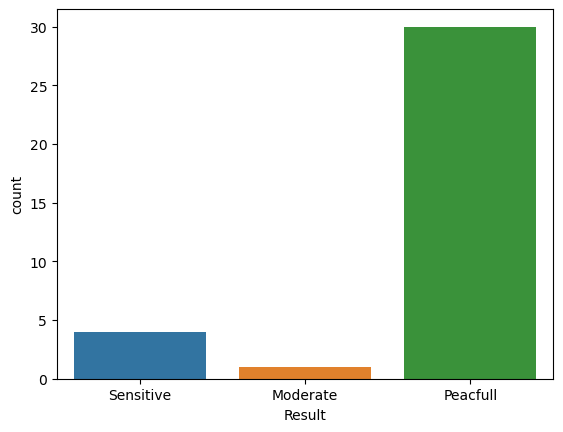

In [323]:
ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())


#03_District_wise_crimes_committed_against_children_2001_2012


In [324]:
df=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv')

In [325]:
#total are available
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

In [326]:
#removing total of each district
df=df.drop(list(df[df["DISTRICT"]=="TOTAL"].index))

In [327]:
District= pd.DataFrame(df.groupby(['DISTRICT','STATE/UT'])['Total'].sum())

District.sort_values(by="Total",ascending=False)


,,Total
DISTRICT,STATE/UT,
INDORE,MADHYA PRADESH,4401
ZDELHI UT TOTAL,DELHI,4179
DELHI UT TOTAL,DELHI,3917
NORTH-WEST,DELHI,3447
PUNE COMMR.,MAHARASHTRA,3391
...,...,...
RAILWAYS JAMMU,JAMMU & KASHMIR,0
TEHRI GARHWAL,UTTARAKHAND,0
RAILWAYS KASHMIR,JAMMU & KASHMIR,0


In [328]:

District ['Result'] = District ['Total'].apply(lambda District: 'Sensitive' if District >=2934  else 'Moderate'if District >=1467 and District <2934 else 'Peacefull')
sorting=y.sort_values(by="Total",ascending=False)

Peacefull    816
Moderate      19
Sensitive      7
Name: Result, dtype: int64


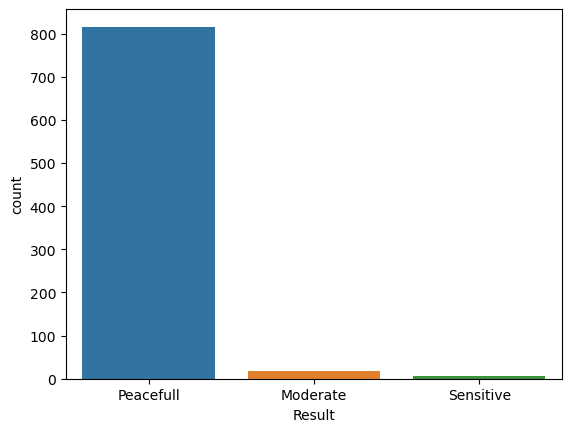

In [329]:
ax=sns.countplot(data= District,x='Result')
print(District ['Result'].value_counts())


In [330]:
sorting.head(17)

,,Total,Result
DISTRICT,STATE/UT,,
BETUL,MADHYA PRADESH,914,Sensitive
MAYURBHANJ,ODISHA,895,Sensitive
NALGONDA,ANDHRA PRADESH,886,Sensitive
SEONI,MADHYA PRADESH,804,Sensitive
TONK,RAJASTHAN,764,Sensitive
SAGAR,MADHYA PRADESH,731,Sensitive
JAGDALPUR,CHHATTISGARH,713,Sensitive
KHANDWA,MADHYA PRADESH,700,Sensitive
WARANGAL,ANDHRA PRADESH,692,Sensitive


In [331]:
sorting.tail(17)

,,Total,Result
DISTRICT,STATE/UT,,
PANCHKULA,HARYANA,0,Peacfull
PALWAL,HARYANA,0,Peacfull
BHIWANI,HARYANA,0,Peacfull
BHOJPUR,BIHAR,0,Peacfull
EOW,DELHI,0,Peacfull
GURDASPUR,PUNJAB,0,Peacfull
OUTER,DELHI,0,Peacfull
GURGAON,HARYANA,0,Peacfull
BIEO,ASSAM,0,Peacfull


In [332]:
states=pd.DataFrame(df.groupby(['STATE/UT'])['Total'].sum())

In [333]:
states['Result'] = states['Total'].apply(lambda states: 'Sensitive' if states>=30256  else 'Moderate'if states>=15128 and states<30256 else 'Peacfull')
sorted_values=states.sort_values(by="Total",ascending=False)
sorted_values


,Total,Result
STATE/UT,,
MADHYA PRADESH,45385,Sensitive
UTTAR PRADESH,36002,Sensitive
DELHI,33014,Sensitive
MAHARASHTRA,31301,Sensitive
ANDHRA PRADESH,16579,Moderate
CHHATTISGARH,13745,Peacfull
GUJARAT,11175,Peacfull
RAJASTHAN,11094,Peacfull
BIHAR,9863,Peacfull


Peacfull     30
Sensitive     4
Moderate      1
Name: Result, dtype: int64


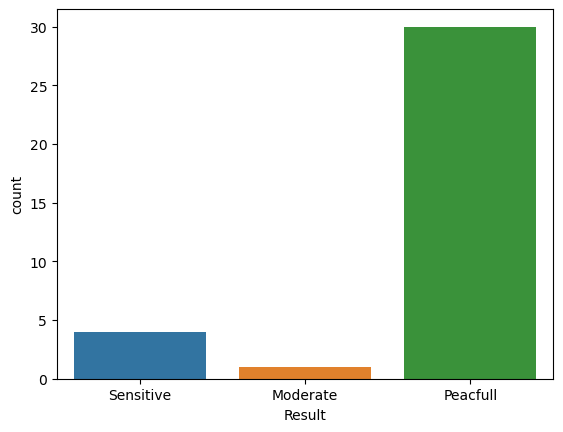

In [334]:
ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())


#42_District_wise_crimes_committed_against_women_2001_2012

In [335]:
#importing data and removing total for every district
df=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
df=df.drop(list(df[df["DISTRICT"]=="TOTAL"].index))

In [336]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [337]:
x=['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']
df['Total']= df[x].sum(axis=1)


In [338]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475
...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,79,256,18,53,6,327,0,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0,2
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0,11


In [339]:
#district wise crime comit againt women
District= pd.DataFrame(df.groupby(['DISTRICT','STATE/UT'])['Total'].sum())



In [340]:
District.sort_values(by="Total",ascending=False)



,,Total
DISTRICT,STATE/UT,
DELHI UT TOTAL,DELHI,48089
MURSHIDABAD,WEST BENGAL,27004
24 PARGANAS SOUTH,WEST BENGAL,25115
24 PARGANAS NORTH,WEST BENGAL,24376
HYDERABAD CITY,ANDHRA PRADESH,19685
...,...,...
G.R.P.,HIMACHAL PRADESH,0
GRP,TRIPURA,0
BIEO,ASSAM,0


In [341]:
District ['Result'] = District ['Total'].apply(lambda District: 'Sensitive' if District >=32059  else 'Moderate'if District >=16029 and District <32059 else 'Peacefull')



Peacefull    821
Moderate       6
Sensitive      1
Name: Result, dtype: int64


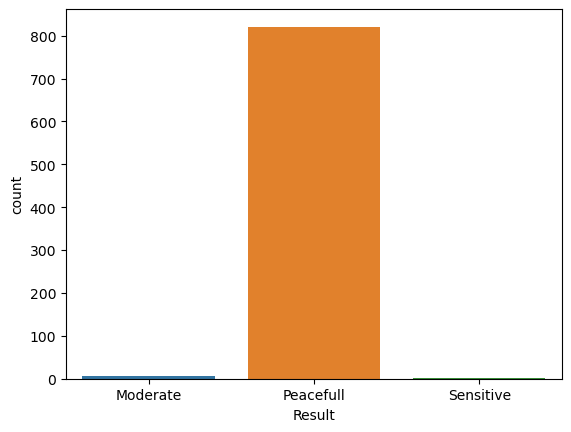

In [342]:

ax=sns.countplot(data= District,x='Result')
print(District ['Result'].value_counts())



In [343]:
sorting=y.sort_values(by="Total",ascending=False)
sorting.head(17)



,,Total,Result
DISTRICT,STATE/UT,,
BETUL,MADHYA PRADESH,914,Sensitive
MAYURBHANJ,ODISHA,895,Sensitive
NALGONDA,ANDHRA PRADESH,886,Sensitive
SEONI,MADHYA PRADESH,804,Sensitive
TONK,RAJASTHAN,764,Sensitive
SAGAR,MADHYA PRADESH,731,Sensitive
JAGDALPUR,CHHATTISGARH,713,Sensitive
KHANDWA,MADHYA PRADESH,700,Sensitive
WARANGAL,ANDHRA PRADESH,692,Sensitive


In [344]:
sorting.tail(17)

,,Total,Result
DISTRICT,STATE/UT,,
PANCHKULA,HARYANA,0,Peacfull
PALWAL,HARYANA,0,Peacfull
BHIWANI,HARYANA,0,Peacfull
BHOJPUR,BIHAR,0,Peacfull
EOW,DELHI,0,Peacfull
GURDASPUR,PUNJAB,0,Peacfull
OUTER,DELHI,0,Peacfull
GURGAON,HARYANA,0,Peacfull
BIEO,ASSAM,0,Peacfull


In [345]:
states=pd.DataFrame(df.groupby(['STATE/UT'])['Total'].sum())

states.sort_values(by="Total",ascending=False)


,Total
STATE/UT,
ANDHRA PRADESH,241784
UTTAR PRADESH,224301
WEST BENGAL,202939
MADHYA PRADESH,183590
RAJASTHAN,176849
MAHARASHTRA,164782
DELHI,96178
ASSAM,93502
KERALA,90514


Peacfull     25
Sensitive     6
Moderate      4
Name: Result, dtype: int64


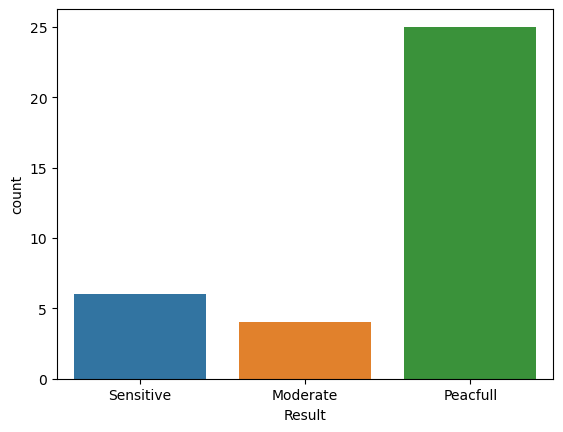

In [346]:
states['Result'] = states['Total'].apply(lambda states: 'Sensitive' if states>=161189  else 'Moderate'if states>=80594 and states<161189 else 'Peacfull')
sorted_values=states.sort_values(by="Total",ascending=False)
sorted_values

ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())


In [347]:

sorted_values.head(35)

,Total,Result
STATE/UT,,
ANDHRA PRADESH,241784,Sensitive
UTTAR PRADESH,224301,Sensitive
WEST BENGAL,202939,Sensitive
MADHYA PRADESH,183590,Sensitive
RAJASTHAN,176849,Sensitive
MAHARASHTRA,164782,Sensitive
DELHI,96178,Moderate
ASSAM,93502,Moderate
KERALA,90514,Moderate


#01_District_wise_crimes_committed_IPC_2001_2012

In [348]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [349]:
df=df.drop(list(df[df["DISTRICT"]=="TOTAL"].index))
df=df.drop(list(df[df["DISTRICT"]=="DELHI UT TOTAL"].index))

In [350]:
District= pd.DataFrame(df.groupby(['DISTRICT','STATE/UT'])['TOTAL IPC CRIMES'].sum())
District.sort_values(by="TOTAL IPC CRIMES",ascending=False)


,,TOTAL IPC CRIMES
DISTRICT,STATE/UT,
BANGALORE COMMR.,KARNATAKA,350347
MUMBAI COMMR.,MAHARASHTRA,222670
AHMEDABAD COMMR.,GUJARAT,218005
INDORE,MADHYA PRADESH,204398
HYDERABAD CITY,ANDHRA PRADESH,202931
...,...,...
CID,HIMACHAL PRADESH,14
RAILWAYS KMR,JAMMU & KASHMIR,10
CID,MANIPUR,9


In [351]:
District ['Result'] = District ['TOTAL IPC CRIMES'].apply(lambda District: 'Sensitive' if District >=233564  else 'Moderate'if District >=116782 and District <233564 else 'Peacefull')

Peacefull    810
Moderate      16
Sensitive      1
Name: Result, dtype: int64


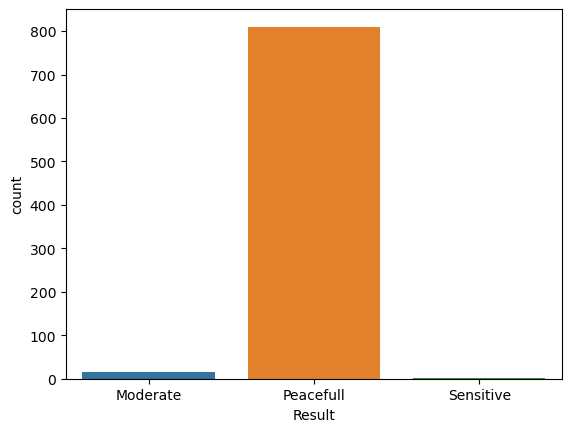

In [352]:
ax=sns.countplot(data= District,x='Result')
print(District ['Result'].value_counts())


In [353]:
sorting=District.sort_values(by="TOTAL IPC CRIMES",ascending=False)
sorting.head(17)



,,TOTAL IPC CRIMES,Result
DISTRICT,STATE/UT,,
BANGALORE COMMR.,KARNATAKA,350347,Sensitive
MUMBAI COMMR.,MAHARASHTRA,222670,Moderate
AHMEDABAD COMMR.,GUJARAT,218005,Moderate
INDORE,MADHYA PRADESH,204398,Moderate
HYDERABAD CITY,ANDHRA PRADESH,202931,Moderate
BHOPAL,MADHYA PRADESH,169575,Moderate
CHENNAI,TAMIL NADU,164467,Moderate
KOLKATA,WEST BENGAL,158429,Moderate
PATNA,BIHAR,147542,Moderate


In [354]:
sorting.tail(17)

,,TOTAL IPC CRIMES,Result
DISTRICT,STATE/UT,,
SPL CELL,DELHI UT,133,Peacefull
NORTH,A & N ISLANDS,115,Peacefull
G.R.P.,HIMACHAL PRADESH,112,Peacefull
ANJAW,ARUNACHAL PRADESH,85,Peacefull
LONGLENG,NAGALAND,84,Peacefull
CID CRIME,GUJARAT,54,Peacefull
RAILWAYS KASHMIR,JAMMU & KASHMIR,43,Peacefull
CRIME KASHMIR,JAMMU & KASHMIR,32,Peacefull
RAILWAYS JAMMU,JAMMU & KASHMIR,29,Peacefull


In [355]:
#States 
states=pd.DataFrame(df.groupby(['STATE/UT'])['TOTAL IPC CRIMES'].sum())
sorted_values=states.sort_values(by="TOTAL IPC CRIMES",ascending=False)
sorted_values

,TOTAL IPC CRIMES
STATE/UT,
MADHYA PRADESH,2413770
MAHARASHTRA,2273436
TAMIL NADU,2060176
ANDHRA PRADESH,2018981
UTTAR PRADESH,1858074
RAJASTHAN,1855916
KARNATAKA,1481063
KERALA,1437459
GUJARAT,1385775


In [356]:
#Clustering states
states['Result'] = states['TOTAL IPC CRIMES'].apply(lambda states: 'Sensitive' if states>=1609180  else 'Moderate'if states>=804590 and states<1609180 else 'Peacfull')

In [357]:
sorted_values=states.sort_values(by="TOTAL IPC CRIMES",ascending=False)
sorted_values


,TOTAL IPC CRIMES,Result
STATE/UT,,
MADHYA PRADESH,2413770,Sensitive
MAHARASHTRA,2273436,Sensitive
TAMIL NADU,2060176,Sensitive
ANDHRA PRADESH,2018981,Sensitive
UTTAR PRADESH,1858074,Sensitive
RAJASTHAN,1855916,Sensitive
KARNATAKA,1481063,Moderate
KERALA,1437459,Moderate
GUJARAT,1385775,Moderate


In [358]:
states.head(10)

,TOTAL IPC CRIMES,Result
STATE/UT,,
A & N ISLANDS,9102,Peacfull
ANDHRA PRADESH,2018981,Sensitive
ARUNACHAL PRADESH,27652,Peacfull
ASSAM,597764,Peacfull
BIHAR,1346293,Moderate
CHANDIGARH,40807,Peacfull
CHHATTISGARH,561027,Peacfull
D & N HAVELI,4651,Peacfull
DAMAN & DIU,2948,Peacfull


Peacfull     24
Sensitive     6
Moderate      5
Name: Result, dtype: int64


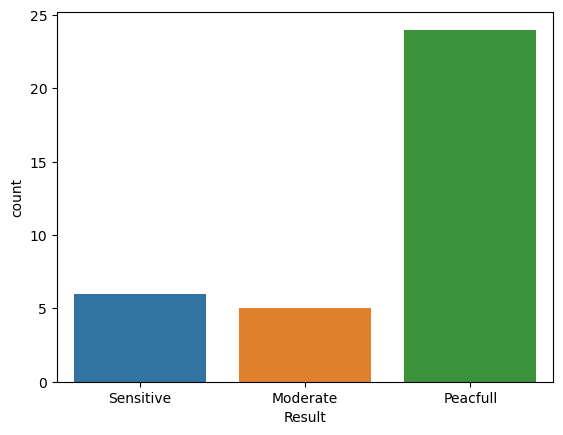

In [359]:
ax=sns.countplot(data=sorted_values,x='Result')
print(sorted_values['Result'].value_counts())
